# V - Merging esbae with CEO data 
### This script serves to merge validated data from CEO with eSBAE points for quick estimation of areas
#### This script requires an m16 instance and select the python 3 kernel
###### For more information contact aurelie.shapiro@fao.org or remi.dannunzio@fao.org

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### combine all CEO sample files
##### download your CEO sample files from collect.earth and upload to SEPAL using FileZilla.
##### add as many files as you have projects

In [2]:
#DRC
#ceo1 = pd.read_csv('/home/sepal-user/module_results/esbae/DRC/ceo-CAFI-DDD-RDC-eSBAE-validation-1-sample-data_prov.csv')
#ceo2 = pd.read_csv('/home/sepal-user/module_results/esbae/DRC/ceo-CAFI-DDD-RDC-eSBAE-validation-2-sample-data.csv')
#ceo3 = pd.read_csv('/home/sepal-user/module_results/esbae/DRC/ceo-CAFI-DDD-RDC-eSBAE-validation-3-sample-data.csv')
#GAB
ceo1 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-1-sample-data.csv')
ceo2 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-2-sample-data.csv')
ceo3 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-3-sample-data.csv')
ceo4 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-4-sample-data.csv')
ceo5 = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/ceo-CAFI-DDD-Gabon-eSBAE-validation-5-sample-data.csv')

##### drop duplicates from ceo collections
###### keep first duplicate by date

In [3]:
column_names = ceo1.columns.tolist()
# Print the list of column names
print(column_names)

['plotid', 'sampleid', 'lon', 'lat', 'email', 'flagged', 'collection_time', 'analysis_duration', 'imagery_title', 'imagery_attributions', 'sample_geom', 'pl_aspect', 'pl_brightness_max', 'pl_red_mean', 'pl_greenness_max', 'pl_cusum_confidence', 'pl_cusum_change_date', 'pl_nir_max', 'pl_red_min', 'pl_bfast_means', 'pl_elevation', 'pl_red_sd', 'pl_cnc_1520', 'pl_swir1_sd', 'pl_index', 'pl_tmf_sub', 'pl_dw_tree_prob__min', 'pl_bs_slope_max', 'pl_red_max', 'pl_images', 'pl_dist', 'pl_bfast_magnitude', 'pl_ccdc_magnitude', 'pl_simple_combined', 'pl_tmf_defyear', 'pl_greenness_mean', 'pl_tmf_2019', 'pl_swir2_sd', 'pl_nir_sd', 'pl_gfc_tc00', 'pl_greenness_min', 'pl_tmf_degyear', 'pl_tmf_2020', 'pl_tmf_2017', 'pl_bs_slope_min', 'pl_lang_tree_height', 'pl_bs_slope_sd', 'pl_dw_class_mode', 'pl_swir1_mean', 'pl_wetness_sd', 'pl_bs_slope_mean', 'pl_ccdc_change_date', 'pl_dw_tree_prob_mean', 'pl_nir_mean', 'pl_dw_tree_prob__stddev', 'pl_tmf_2016', 'pl_nir_min', 'pl_esri_lc17', 'pl_wetness_mean', 'p

##### merge all ceo files

In [4]:
#make a list of the ceo files first
ceo_files = [ceo1, ceo2, ceo3,ceo4,ceo5]

##### add a column named "interpreted" which = 1 when the point has been validated in CEO, otherwise 0
##### count the number of validated points per ceo file
##### replace forest and non-forest types with codes

In [5]:
# List to store the modified DataFrames
modified_ceo_files = []

# Initialize collection counter
collection_counter = 1

for i, ceo in enumerate(ceo_files):
       
    # Sort the DataFrame by 'date' in descending order
    ceo.sort_values(by='collection_time', ascending=True, inplace=True)

    # Remove duplicates keeping the last occurrence (the most recent date)
    ceo.drop_duplicates(subset='pl_point_id', keep='first', inplace=True)

    # Reset the index
    ceo.reset_index(drop=True, inplace=True)
    
    # Add 'collection' column with an increasing number
    ceo['collection'] = collection_counter
    
    # Add 'interpreted' column with 1 when 'email' is not null, otherwise 0
    ceo['interpreted'] = np.where(ceo['email'].notna(), 1, 0)
    
    # Calculate total count for each 'interpreted' value
    interpreted_counts = ceo['interpreted'].value_counts().to_dict()
    
    # Append the modified DataFrame to the list
    modified_ceo_files.append(ceo)
    
    # Print count for the current DataFrame
    print(f"ceo {i + 1} # of validated points: {interpreted_counts.get(1, 0)}, # of not validated points: {interpreted_counts.get(0, 0)}")
    
    # Increment the collection counter
    collection_counter += 1

# Concatenate the modified DataFrames into one merged DataFrame
merged_ceo = pd.concat(modified_ceo_files, ignore_index=True)


# Specify the columns you want to keep in the merged DataFrame
columns_to_keep = ['plotid', 'sampleid', 'lon', 'lat', 'email', 'flagged', 'collection_time', 'analysis_duration', 
                    'sample_geom', 'pl_point_id', 'pl_chg_prob', 'pl_simple_combined', 'pl_strata', 'forêt ou non-forêt en 2015?', "Y'a t'il de la régéneration", 
                    'Changement entre 2015-2022', 'Type de Changement (2015-2022)', 'Exploitation forestière artisanale (<5ha)', 
                    'Activité minière artisanale', 'Infrastructure routière', 'Infrastructure d’urbanisation ou habitations', 
                    'Exploitation forestière industrielle (>5ha)', 'Autre moteur', 'Descriptif autre moteur', 'Activité minière industrielle', 
                    'Agriculture industrielle', 'Agriculture paysanne', 'Année de Changement', 'Type de non-forêt en 2015', 'Type de forêt en 2015', 'Commentaires', 'collection', 'interpreted']

# Select only the specified columns
merged_ceo = merged_ceo[columns_to_keep]

# Create a dictionary to map old column names to new column names
column_mapping = {
    'pl_point_id': 'point_id',
    'pl_chg_prob': 'chg_prob', 
    'pl_simple_combined': 'simple_combined', 
    'pl_strata': 'stratum',
    'forêt ou non-forêt en 2015?': 'Ref_FNF_2015', 
    "Y'a t'il de la régéneration": 'Ref_regeneration',
    'Changement entre 2015-2022': 'Ref_Change_1522', 
    'Type de Changement (2015-2022)': 'Ref_Change_Type_1522', 
    'Exploitation forestière artisanale (<5ha)': 'ArtFor',
    'Activité minière artisanale': 'ArtMine',
    'Infrastructure routière': 'InfraR', 
    'Infrastructure d’urbanisation ou habitations': 'Urb',
    'Exploitation forestière industrielle (>5ha)':'IndFor', 
    'Autre moteur': 'Other', 
    'Descriptif autre moteur': 'Other_Desc', 
    'Activité minière industrielle': 'IndMine', 
    'Agriculture industrielle': 'IndAg', 
    'Agriculture paysanne': 'ArtFor', 
    'Année de Changement': 'Ref_Year', 
    'Type de non-forêt en 2015':'Ref_NFType', 
    'Type de forêt en 2015':'Ref_FType'
}

# Use the rename() method to rename the columns
merged_ceo = merged_ceo.rename(columns=column_mapping)

# Define the replacements as a dictionary
replace_dict = {
    'Ref_FNF_2015': {'non-forêt': '0', 'forêt': '1'},
    'Ref_FType': {'1 - forêt dense': '1', '2 - forêt dense sèche': '2', '3 - forêt secondaire': '3','4 - forêt claire sèche': '4','7 - forêt mangrove': '7',
                 '8 - forêt marécageuse': '8', '9 - forêt galérie': '9','10 - plantation forestière': '10', '11- savane arborée': '11'},
    'Ref_NFType': {'12 - savane arbustive': '12', '13 - savane herbacée': '13', '14 - prairie aquatique': '14', '15 - sol nu végétation éparse': '15',
                  '16 - terres cultivées': '16', '17 - zone baties': '17', '18 - eau': '18'},
    'Ref_Change_1522': {'oui':'1','non':'0'},
    'ArtFor':{'oui':'1','non':'0'},
    'IndFor':{'oui':'1','non':'0'},
    'ArtAg':{'oui':'1','non':'0'},
    'IndAg':{'oui':'1','non':'0'},
    'ArtMine':{'oui':'1','non':'0'},
    'IndMine':{'oui':'1','non':'0'},
    'Urb':{'oui':'1','non':'0'},
    'InfraR':{'oui':'1','non':'0'},
    'Other':{'oui':'1','non':'0'}
}

# Use the replace() method to replace strings in specified columns
merged_ceo.replace(replace_dict, inplace=True)

ceo 1 # of validated points: 499, # of not validated points: 0
ceo 2 # of validated points: 3524, # of not validated points: 0
ceo 3 # of validated points: 367, # of not validated points: 4260
ceo 4 # of validated points: 49, # of not validated points: 4211
ceo 5 # of validated points: 1726, # of not validated points: 2485


In [6]:
merged_ceo_interpreted = merged_ceo[merged_ceo['interpreted'] == 1]

In [7]:
merged_column_names = merged_ceo_interpreted.columns.tolist()
# Print the list of column names
print(merged_column_names)

['plotid', 'sampleid', 'lon', 'lat', 'email', 'flagged', 'collection_time', 'analysis_duration', 'sample_geom', 'point_id', 'chg_prob', 'simple_combined', 'stratum', 'Ref_FNF_2015', 'Ref_regeneration', 'Ref_Change_1522', 'Ref_Change_Type_1522', 'ArtFor', 'ArtMine', 'InfraR', 'Urb', 'IndFor', 'Other', 'Other_Desc', 'IndMine', 'IndAg', 'ArtFor', 'Ref_Year', 'Ref_NFType', 'Ref_FType', 'Commentaires', 'collection', 'interpreted']


In [8]:
merged_ceo_interpreted.head()

,plotid,sampleid,lon,lat,email,flagged,collection_time,analysis_duration,sample_geom,point_id,chg_prob,simple_combined,stratum,Ref_FNF_2015,Ref_regeneration,Ref_Change_1522,Ref_Change_Type_1522,ArtFor,ArtMine,InfraR,Urb,IndFor,Other,Other_Desc,IndMine,IndAg,ArtFor,Ref_Year,Ref_NFType,Ref_FType,Commentaires,collection,interpreted
0,157,157,9.562020,0.937144,aurelie.shapiro@fao.org,False,2023-06-19 11:44,69.0 secs,POINT(9.56202 0.937144),157,0.02,0.02,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,,1,1
1,329,329,9.429149,0.579857,aurelie.shapiro@fao.org,False,2023-06-19 11:56,719.6 secs,POINT(9.429149 0.579857),329,0.17,0.17,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,rentrez vos commentaires,1,1
2,1248,1248,9.676546,0.811602,aurelie.shapiro@fao.org,False,2023-06-19 11:57,83.5 secs,POINT(9.676546 0.811602),1248,0.08,0.08,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,rentrez vos commentaires,1,1
3,2227,2227,9.603020,0.492889,obameconanvassily@gmail.com,False,2023-06-21 09:22,137.2 secs,POINT(9.60302 0.492889),2227,0.18,0.18,2,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,rentrez vos commentaires,1,1
4,1830,1830,9.420420,0.193344,jeannorbertminkomengue@gmail.com,False,2023-06-21 09:22,127.2 secs,POINT(9.42042 0.193344),1830,0.11,0.11,1,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,rentrez vos commentaires,1,1


In [9]:
merged_ceo_interpreted = merged_ceo_interpreted.sort_values(by='collection', ascending=True)

# Remove duplicates keeping the last occurrence (the most recent date)
merged_ceo_nodup = merged_ceo_interpreted.drop_duplicates(subset='point_id', keep='first')

# Reset the index
merged_ceo_nodup = merged_ceo_nodup.reset_index(drop=True)

In [10]:
merged_ceo_nodup['Ref_FNF_2015'].value_counts()

1    4842
0    1204
Name: Ref_FNF_2015, dtype: int64

In [11]:
merged_ceo_nodup['Ref_Change_1522'].value_counts()

0    4621
1     221
Name: Ref_Change_1522, dtype: int64

In [12]:
merged_ceo_nodup['Ref_Change_Type_1522'].value_counts()

dégradation      152
déforestation     69
Name: Ref_Change_Type_1522, dtype: int64

In [13]:
merged_ceo_nodup['interpreted'].value_counts()

1    6046
Name: interpreted, dtype: int64

In [14]:
merged_ceo_nodup['collection'].value_counts()

2    3524
5    1628
1     499
3     349
4      46
Name: collection, dtype: int64

In [ ]:
merged_ceo_nodup['stratum'].value_counts()

##### Check if values in 'pointid' are unique

In [ ]:
# this might take some time
unique_check = merged_ceo_nodup['point_id'].nunique() == len(merged_ceo_nodup['point_id'])

# Print the result
if unique_check:
    print("All values are unique!")
else:
    print("F$%§!")

##### if there are duplicates determine which points and which project (collection)

In [ ]:
# Find duplicate values in the 'ID' column
#duplicate_ids = merged_ceo_nodup[merged_ceo_nodup.duplicated(subset='point_id', keep='first')]

# If you want to print specific columns along with duplicates, you can do:
# For example, print only 'ID' and 'Name' columns
#print("\nDuplicate Rows with 'ID' and 'Name':")
#print(duplicate_ids[['point_id', 'collection']])
#len(duplicate_ids)

In [ ]:
#merged_ceo_nodup.head()

## add new columns for change and year

#### clean up columns and replace values

In [15]:
def f(x):
  if x['Ref_FNF_2015'] == '0' : return 'NF'
  elif x['Ref_Change_Type_1522'] == 'déforestation': return 'Def'
  elif x['Ref_Change_Type_1522'] == 'dégradation' : return 'Deg'
  else: return 'Stable'

merged_ceo_nodup['Ref_Change_Type_1522'] = merged_ceo_nodup.apply(f, axis=1)
merged_ceo_nodup['Ref_Change_Type_1522'].value_counts()

Stable    4621
NF        1204
Deg        152
Def         69
Name: Ref_Change_Type_1522, dtype: int64

In [16]:
def y(x):
  if x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year'] == 2016: return 'Def2016'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year'] == 2017: return 'Def2017'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year'] == 2018: return 'Def2018'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year'] == 2019: return 'Def2019'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year'] == 2020: return 'Def2020'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year'] == 2021: return 'Def2021'
  elif x['Ref_Change_Type_1522'] == 'Def' and x['Ref_Year'] == 2022: return 'Def2022'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year'] == 2016: return 'Deg2016'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year'] == 2017: return 'Deg2017'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year'] == 2018: return 'Deg2018'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year'] == 2019: return 'Deg2019'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year'] == 2020: return 'Deg2020'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year'] == 2021: return 'Deg2021'
  elif x['Ref_Change_Type_1522'] == 'Deg' and x['Ref_Year'] == 2022: return 'Deg2022'
  elif x['Ref_Change_Type_1522'] == 'NF' : return 'NF'
  elif x['Ref_Change_Type_1522'] == 'Stable' : return 'Stable'
  else: return ''

merged_ceo_nodup['Ref_ChangeYear_1522'] = merged_ceo_nodup.apply(y, axis=1)

annual_counts = merged_ceo_nodup['Ref_ChangeYear_1522'].value_counts()
annual_counts = annual_counts.sort_index()
print(annual_counts)

Def2016      21
Def2017      13
Def2018       7
Def2019       2
Def2020       6
Def2021       7
Def2022      13
Deg2016      14
Deg2017      14
Deg2018      23
Deg2019      16
Deg2020      26
Deg2021      22
Deg2022      37
NF         1204
Stable     4621
Name: Ref_ChangeYear_1522, dtype: int64


In [17]:
annual_counts.sum()

6046

In [ ]:
#export cleaned CEO data
ceo_out = '/home/sepal-user/module_results/esbae/GAB/GAB_esbae_all_ceo_clean.csv'
merged_ceo_nodup.to_csv(ceo_out,index=True)

#### read all esbae points with augmented data (output from script 5a)

In [66]:
# Read the CSV files
#DRC
#esbae = pd.read_csv('/home/sepal-user/module_results/esbae/DRC/DRC_esbae_2015_2022_model.csv')
#GAB
esbae = pd.read_csv('/home/sepal-user/module_results/esbae/GAB/GAB_esbae_2015_2022_model.csv')
len(esbae)

222878

In [67]:
#save this for eSBAE calculations
esbae['stratum'].value_counts()

1    172836
2     39981
3     10061
Name: stratum, dtype: int64

##### Rename columns to be same as ceo file 

In [68]:
esbae = esbae.rename(columns={'PLOTID': 'plotid'})
esbae = esbae.rename(columns={'LAT': 'lat'})
esbae = esbae.rename(columns={'LON': 'lon'})

In [69]:
print(esbae.dtypes)

images                    int64
mon_images                int64
bfast_change_date       float64
bfast_magnitude         float64
bfast_means             float64
cusum_change_date       float64
cusum_confidence        float64
cusum_magnitude         float64
red_mean                float64
red_sd                  float64
red_min                 float64
red_max                 float64
nir_mean                float64
nir_sd                  float64
nir_min                 float64
nir_max                 float64
swir1_mean              float64
swir1_sd                float64
swir1_min               float64
swir1_max               float64
swir2_mean              float64
swir2_sd                float64
swir2_min               float64
swir2_max               float64
ndfi_mean               float64
ndfi_sd                 float64
ndfi_min                float64
ndfi_max                float64
brightness_mean         float64
brightness_sd           float64
brightness_min          float64
brightne

In [70]:
len(esbae)

222878

In [71]:
eSBAE_cols = esbae.columns
eSBAE_cols

Index(['images', 'mon_images', 'bfast_change_date', 'bfast_magnitude',
       'bfast_means', 'cusum_change_date', 'cusum_confidence',
       'cusum_magnitude', 'red_mean', 'red_sd', 'red_min', 'red_max',
       'nir_mean', 'nir_sd', 'nir_min', 'nir_max', 'swir1_mean', 'swir1_sd',
       'swir1_min', 'swir1_max', 'swir2_mean', 'swir2_sd', 'swir2_min',
       'swir2_max', 'ndfi_mean', 'ndfi_sd', 'ndfi_min', 'ndfi_max',
       'brightness_mean', 'brightness_sd', 'brightness_min', 'brightness_max',
       'greenness_mean', 'greenness_sd', 'greenness_min', 'greenness_max',
       'wetness_mean', 'wetness_sd', 'wetness_min', 'wetness_max',
       'bs_slope_mean', 'bs_slope_sd', 'bs_slope_max', 'bs_slope_min',
       'ccdc_change_date', 'ccdc_magnitude', 'aspect', 'dw_class_mode',
       'dw_tree_prob__max', 'dw_tree_prob__min', 'dw_tree_prob__stdDev',
       'dw_tree_prob_mean', 'elevation', 'esa_lc20', 'esa_lc21', 'esri_lc17',
       'esri_lc18', 'esri_lc19', 'esri_lc20', 'esri_lc21', 'gfc_

### Merge ceo and sbae tables
#### replace validated points in esbae points

In [72]:
#make list of point_ids of validated points
validated_id_list = merged_ceo_nodup['point_id'].tolist()
len(validated_id_list)

6046

In [73]:
# Merge ceo and sbae on "pointid" with an outer join
esbae_ceo = pd.merge(esbae, merged_ceo_nodup, on='point_id', how='outer')

In [74]:
len(esbae_ceo) 

222878

In [75]:
esbae_ceo.head()

,images,mon_images,bfast_change_date,bfast_magnitude,bfast_means,cusum_change_date,cusum_confidence,cusum_magnitude,red_mean,red_sd,red_min,red_max,nir_mean,nir_sd,nir_min,nir_max,swir1_mean,swir1_sd,swir1_min,swir1_max,swir2_mean,swir2_sd,swir2_min,swir2_max,ndfi_mean,ndfi_sd,ndfi_min,ndfi_max,brightness_mean,brightness_sd,brightness_min,brightness_max,greenness_mean,greenness_sd,greenness_min,greenness_max,wetness_mean,wetness_sd,wetness_min,wetness_max,bs_slope_mean,bs_slope_sd,bs_slope_max,bs_slope_min,ccdc_change_date,ccdc_magnitude,aspect,dw_class_mode,dw_tree_prob__max,dw_tree_prob__min,dw_tree_prob__stdDev,dw_tree_prob_mean,elevation,esa_lc20,esa_lc21,esri_lc17,esri_lc18,esri_lc19,esri_lc20,esri_lc21,gfc_gain,gfc_loss,gfc_lossyear,gfc_tc00,lang_tree_height,potapov_tree_height,slope,tmf_2016,tmf_2017,tmf_2018,tmf_2019,tmf_2020,tmf_defyear,tmf_degyear,tmf_main,tmf_sub,geometry,point_id,cnc_1520,chg_prob_x,simple_combined_x,stratum_x,kmeans,plotid_x,lon_x,lat_x,plotid_y,sampleid,lon_y,lat_y,email,flagged,collection_time,analysis_duration,sample_geom,chg_prob_y,simple_combined_y,stratum_y,Ref_FNF_2015,Ref_regeneration,Ref_Change_1522,Ref_Change_Type_1522,ArtFor,ArtMine,InfraR,Urb,IndFor,Other,Other_Desc,IndMine,IndAg,ArtFor,Ref_Year,Ref_NFType,Ref_FType,Commentaires,collection,interpreted,Ref_ChangeYear_1522
0,24,18,-1.000,0.000000,0.000000,2021.910,0.181007,4131.444444,9497.777778,758.572842,7576.0,10000.0,9497.777778,758.572842,7576.0,10000.0,9497.777778,758.572842,7576.0,10000.0,9497.777778,758.572842,7576.0,10000.0,9497.777778,758.572842,7576.0,10000.0,9497.777778,758.572842,7576.0,10000.0,9497.777778,758.572842,7576.0,10000.0,9497.777778,758.572842,7576.0,10000.0,2.826460,118.259914,447.200372,-319.848854,0.0,0.0,236.0,1.0,74.0,61.0,4.0,71.0,641.121338,10.0,10.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,NaN,90.0,NaN,32.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,10.0,10.0,POINT (10.808075 0.985209),25921,NaN,0.061333,0.061333,1,1,25921,10.808075,0.985209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34,23,2018.405,598.922913,1.380394,2020.049,0.163564,1674.695652,9812.615942,264.434409,9182.0,10000.0,9812.615942,264.434409,9182.0,10000.0,9812.615942,264.434409,9182.0,10000.0,9812.615942,264.434409,9182.0,10000.0,9812.615942,264.434409,9182.0,10000.0,9812.615942,264.434409,9182.0,10000.0,9812.615942,264.434409,9182.0,10000.0,9812.615942,264.434409,9182.0,10000.0,-29.598860,18.958475,24.463131,-99.607933,0.0,0.0,237.0,1.0,74.0,4.0,27.0,58.0,639.243347,10.0,10.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,NaN,90.0,36.0,30.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,10.0,10.0,POINT (10.813032 0.99486),25922,NaN,0.029333,0.029333,1,1,25922,10.813032,0.994860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,78,54,2019.564,-27.340593,-3.575148,2020.244,0.276399,5626.759259,9804.759259,535.542293,6450.0,10000.0,9804.759259,535.542293,6450.0,10000.0,9804.759259,535.542293,6450.0,10000.0,9804.759259,535.542293,6450.0,10000.0,9804.759259,535.542293,6450.0,10000.0,9804.759259,535.542293,6450.0,10000.0,9804.759259,535.542293,6450.0,10000.0,9804.759259,535.542293,6450.0,10000.0,-40.161993,16.809940,2.206264,-95.636398,0.0,0.0,267.0,1.0,75.0,4.0,22.0,62.0,29.473024,10.0,10.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,NaN,90.0,31.0,28.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,10.0,10.0,POINT (9.518357 -2.113984),37361,NaN,0.103333,0.103333,1,1,37361,9.518357,-2.113984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,72,50,2021.184,-37.800522,-0.788728,2020.222,0.302968,2086.745333,9896.075333,184.351222,9194.5,10000.0,9896.075333,184.351222,9194.5,10000.0,9896.075333,184.351222,9194.5,10000.0,9896.075333,184.351222,9194.5,10000.0,9896.075333,184.351222,9194.5,10000.0,9896.075333,184.351222,9194.5,10000.0,9896.075333,184.351222,9194.5,10000.0,9896.07533

#### rename _x and _y columns

In [76]:
#rename columns
esbae_ceo.columns = esbae_ceo.columns.str.replace('_x', '')
esbae_ceo.columns = esbae_ceo.columns.str.replace('_y', '')
esbae_ceo.head()

,images,mon_images,bfast_change_date,bfast_magnitude,bfast_means,cusum_change_date,cusum_confidence,cusum_magnitude,red_mean,red_sd,red_min,red_max,nir_mean,nir_sd,nir_min,nir_max,swir1_mean,swir1_sd,swir1_min,swir1_max,swir2_mean,swir2_sd,swir2_min,swir2_max,ndfi_mean,ndfi_sd,ndfi_min,ndfi_max,brightness_mean,brightness_sd,brightness_min,brightness_max,greenness_mean,greenness_sd,greenness_min,greenness_max,wetness_mean,wetness_sd,wetness_min,wetness_max,bs_slope_mean,bs_slope_sd,bs_slope_max,bs_slope_min,ccdc_change_date,ccdc_magnitude,aspect,dw_class_mode,dw_tree_prob__max,dw_tree_prob__min,dw_tree_prob__stdDev,dw_tree_prob_mean,elevation,esa_lc20,esa_lc21,esri_lc17,esri_lc18,esri_lc19,esri_lc20,esri_lc21,gfc_gain,gfc_loss,gfc_lossyear,gfc_tc00,lang_tree_height,potapov_tree_height,slope,tmf_2016,tmf_2017,tmf_2018,tmf_2019,tmf_2020,tmf_defyear,tmf_degyear,tmf_main,tmf_sub,geometry,point_id,cnc_1520,chg_prob,simple_combined,stratum,kmeans,plotid,lon,lat,plotid,sampleid,lon,lat,email,flagged,collection_time,analysis_duration,sample_geom,chg_prob,simple_combined,stratum,Ref_FNF_2015,Ref_regeneration,Ref_Change_1522,Ref_Change_Type_1522,ArtFor,ArtMine,InfraR,Urb,IndFor,Other,Other_Desc,IndMine,IndAg,ArtFor,Ref_Year,Ref_NFType,Ref_FType,Commentaires,collection,interpreted,Ref_ChangeYear_1522
0,24,18,-1.000,0.000000,0.000000,2021.910,0.181007,4131.444444,9497.777778,758.572842,7576.0,10000.0,9497.777778,758.572842,7576.0,10000.0,9497.777778,758.572842,7576.0,10000.0,9497.777778,758.572842,7576.0,10000.0,9497.777778,758.572842,7576.0,10000.0,9497.777778,758.572842,7576.0,10000.0,9497.777778,758.572842,7576.0,10000.0,9497.777778,758.572842,7576.0,10000.0,2.826460,118.259914,447.200372,-319.848854,0.0,0.0,236.0,1.0,74.0,61.0,4.0,71.0,641.121338,10.0,10.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,NaN,90.0,NaN,32.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,10.0,10.0,POINT (10.808075 0.985209),25921,NaN,0.061333,0.061333,1,1,25921,10.808075,0.985209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34,23,2018.405,598.922913,1.380394,2020.049,0.163564,1674.695652,9812.615942,264.434409,9182.0,10000.0,9812.615942,264.434409,9182.0,10000.0,9812.615942,264.434409,9182.0,10000.0,9812.615942,264.434409,9182.0,10000.0,9812.615942,264.434409,9182.0,10000.0,9812.615942,264.434409,9182.0,10000.0,9812.615942,264.434409,9182.0,10000.0,9812.615942,264.434409,9182.0,10000.0,-29.598860,18.958475,24.463131,-99.607933,0.0,0.0,237.0,1.0,74.0,4.0,27.0,58.0,639.243347,10.0,10.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,NaN,90.0,36.0,30.0,3.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,10.0,10.0,POINT (10.813032 0.99486),25922,NaN,0.029333,0.029333,1,1,25922,10.813032,0.994860,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,78,54,2019.564,-27.340593,-3.575148,2020.244,0.276399,5626.759259,9804.759259,535.542293,6450.0,10000.0,9804.759259,535.542293,6450.0,10000.0,9804.759259,535.542293,6450.0,10000.0,9804.759259,535.542293,6450.0,10000.0,9804.759259,535.542293,6450.0,10000.0,9804.759259,535.542293,6450.0,10000.0,9804.759259,535.542293,6450.0,10000.0,9804.759259,535.542293,6450.0,10000.0,-40.161993,16.809940,2.206264,-95.636398,0.0,0.0,267.0,1.0,75.0,4.0,22.0,62.0,29.473024,10.0,10.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,NaN,90.0,31.0,28.0,2.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,10.0,10.0,POINT (9.518357 -2.113984),37361,NaN,0.103333,0.103333,1,1,37361,9.518357,-2.113984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,72,50,2021.184,-37.800522,-0.788728,2020.222,0.302968,2086.745333,9896.075333,184.351222,9194.5,10000.0,9896.075333,184.351222,9194.5,10000.0,9896.075333,184.351222,9194.5,10000.0,9896.075333,184.351222,9194.5,10000.0,9896.075333,184.351222,9194.5,10000.0,9896.075333,184.351222,9194.5,10000.0,9896.075333,184.351222,9194.5,10000.0,9896.075333,184.351222,9194.5,1000

In [77]:
merged_columns = esbae_ceo.columns.tolist()
print(merged_columns)

['images', 'mon_images', 'bfast_change_date', 'bfast_magnitude', 'bfast_means', 'cusum_change_date', 'cusum_confidence', 'cusum_magnitude', 'red_mean', 'red_sd', 'red_min', 'red_max', 'nir_mean', 'nir_sd', 'nir_min', 'nir_max', 'swir1_mean', 'swir1_sd', 'swir1_min', 'swir1_max', 'swir2_mean', 'swir2_sd', 'swir2_min', 'swir2_max', 'ndfi_mean', 'ndfi_sd', 'ndfi_min', 'ndfi_max', 'brightness_mean', 'brightness_sd', 'brightness_min', 'brightness_max', 'greenness_mean', 'greenness_sd', 'greenness_min', 'greenness_max', 'wetness_mean', 'wetness_sd', 'wetness_min', 'wetness_max', 'bs_slope_mean', 'bs_slope_sd', 'bs_slope_max', 'bs_slope_min', 'ccdc_change_date', 'ccdc_magnitude', 'aspect', 'dw_class_mode', 'dw_tree_prob__max', 'dw_tree_prob__min', 'dw_tree_prob__stdDev', 'dw_tree_prob_mean', 'elevation', 'esa_lc20', 'esa_lc21', 'esri_lc17', 'esri_lc18', 'esri_lc19', 'esri_lc20', 'esri_lc21', 'gfc_gain', 'gfc_loss', 'gfc_lossyear', 'gfc_tc00', 'lang_tree_height', 'potapov_tree_height', 'slope'

In [78]:
esbae_ceo['interpreted'].value_counts(dropna=False)

NaN    216832
1.0      6046
Name: interpreted, dtype: int64

In [79]:
esbae_ceo['interpreted'] = esbae_ceo['interpreted'].fillna(0)

In [80]:
esbae_ceo['interpreted'].value_counts(dropna=False)

0.0    216832
1.0      6046
Name: interpreted, dtype: int64

In [81]:
esbae_ceo['Ref_ChangeYear_1522'].value_counts(dropna=False)

NaN        216832
Stable       4621
NF           1204
Deg2022        37
Deg2020        26
Deg2018        23
Deg2021        22
Def2016        21
Deg2019        16
Deg2016        14
Deg2017        14
Def2022        13
Def2017        13
Def2018         7
Def2021         7
Def2020         6
Def2019         2
Name: Ref_ChangeYear_1522, dtype: int64

In [ ]:
esbae_ceo_columns = ['images', 'mon_images', 'bfast_change_date', 
                     'bfast_magnitude', 'bfast_means', 'cusum_change_date', 
                     'cusum_confidence', 'cusum_magnitude', 'red_mean', 'red_sd', 
                     'red_min', 'red_max', 'nir_mean', 'nir_sd', 'nir_min', 'nir_max', 
                     'swir1_mean', 'swir1_sd', 'swir1_min', 'swir1_max', 'swir2_mean', 
                     'swir2_sd', 'swir2_min', 'swir2_max', 'ndfi_mean', 'ndfi_sd', 'ndfi_min',
                     'ndfi_max', 'brightness_mean', 'brightness_sd', 'brightness_min', 
                     'brightness_max', 'greenness_mean', 'greenness_sd', 'greenness_min', 
                     'greenness_max', 'wetness_mean', 'wetness_sd', 'wetness_min', 'wetness_max', 
                     'bs_slope_mean', 'bs_slope_sd', 'bs_slope_max', 'bs_slope_min', 'ccdc_change_date', 
                     'ccdc_magnitude', 'aspect', 'dw_class_mode', 'dw_tree_prob__max', 'dw_tree_prob__min', 
                     'dw_tree_prob__stdDev', 'dw_tree_prob_mean', 'elevation', 'esa_lc20', 'esa_lc21', 
                     'esri_lc17', 'esri_lc18', 'esri_lc19', 'esri_lc20', 'esri_lc21', 'gfc_gain', 'gfc_loss', 
                     'gfc_lossyear', 'gfc_tc00', 'lang_tree_height', 'potapov_tree_height', 'slope', 'tmf_2016', 
                     'tmf_2017', 'tmf_2018', 'tmf_2019', 'tmf_2020', 'tmf_defyear', 'tmf_degyear', 'tmf_main', 
                     'tmf_sub', 'geometry', 'point_id', 'cnc_1520', 'chg_prob', 'simple_combined', 'stratum', 
                     'kmeans', 'plotid_x', 'lon', 'lat', 'sampleid', 'email', 'flagged', 
                     'collection_time', 'analysis_duration', 'sample_geom', 'Ref_FNF_2015', 'Ref_regeneration', 
                     'Ref_Change_1522', 'Ref_Change_Type_1522', 'ArtFor', 'ArtMine', 'InfraR', 'Urb', 'IndFor', 
                     'Other', 'Other_Desc', 'IndMine', 'IndAg', 'ArtFor', 'Ref_Year', 'Ref_NFType', 'Ref_FType', 
                     'Commentaires', 'collection', 'interpreted', 'Ref_ChangeYear_1522']

In [ ]:
# Initialize a dictionary to store the counts by column
missing_counts = {}

# Count missing values and sum the counts by column
for column in merged_columns:
    missing_counts[column] = esbae_ceo[column].isna().sum()

# Print the counts
print(missing_counts)

##### plot deforestation points by year

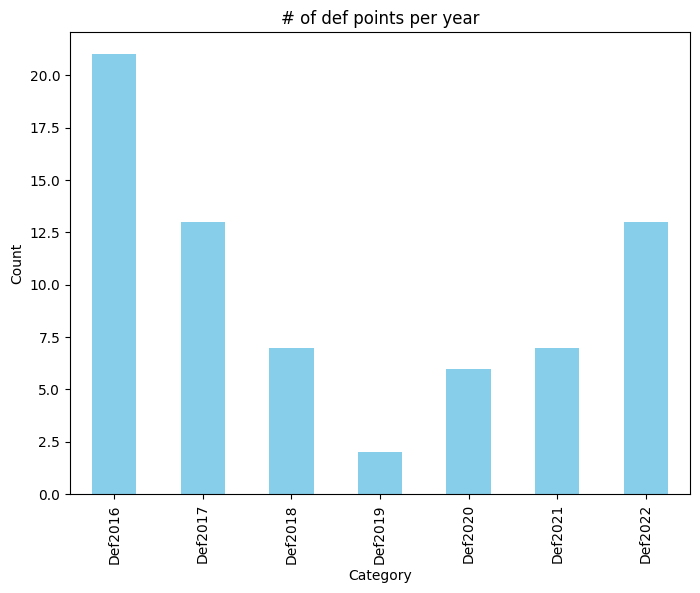

In [58]:
#select the values you want to plot
values_to_plot = ['Def2016','Def2017','Def2018','Def2019','Def2020','Def2021','Def2022']

# Filter the DataFrame to include only the selected values
filtered_df = esbae_ceo[esbae_ceo['Ref_ChangeYear_1522'].isin(values_to_plot)]

# Get the value counts and sort by index (alphabetically)
defvalue_counts = filtered_df['Ref_ChangeYear_1522'].value_counts().sort_index()

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
defvalue_counts.plot(kind='bar', color='skyblue')


# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('# of def points per year')

# Show the plot
plt.show()

##### plot degradation points by year

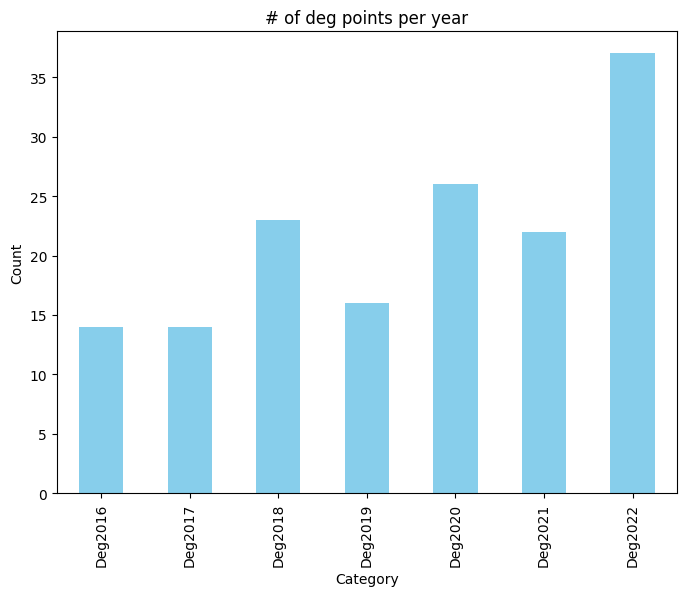

In [59]:
#plot DEG 
#select the values you want to plot
values_to_plot = ['Deg2016','Deg2017','Deg2018','Deg2019','Deg2020','Deg2021','Deg2022']

# Filter the DataFrame to include only the selected values
filtered_df = esbae_ceo[esbae_ceo['Ref_ChangeYear_1522'].isin(values_to_plot)]

# Get the value counts and sort by index (alphabetically)
degvalue_counts = filtered_df['Ref_ChangeYear_1522'].value_counts().sort_index()

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
degvalue_counts.plot(kind='bar', color='skyblue')


# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('# of deg points per year')

# Show the plot
plt.show()

In [60]:
print(esbae_ceo.columns.values)

['images' 'mon_images' 'bfast_change_date' 'bfast_magnitude' 'bfast_means'
 'cusum_change_date' 'cusum_confidence' 'cusum_magnitude' 'red_mean'
 'red_sd' 'red_min' 'red_max' 'nir_mean' 'nir_sd' 'nir_min' 'nir_max'
 'swir1_mean' 'swir1_sd' 'swir1_min' 'swir1_max' 'swir2_mean' 'swir2_sd'
 'swir2_min' 'swir2_max' 'ndfi_mean' 'ndfi_sd' 'ndfi_min' 'ndfi_max'
 'brightness_mean' 'brightness_sd' 'brightness_min' 'brightness_max'
 'greenness_mean' 'greenness_sd' 'greenness_min' 'greenness_max'
 'wetness_mean' 'wetness_sd' 'wetness_min' 'wetness_max' 'bs_slope_mean'
 'bs_slope_sd' 'bs_slope_max' 'bs_slope_min' 'ccdc_change_date'
 'ccdc_magnitude' 'aspect' 'dw_class_mode' 'dw_tree_prob__max'
 'dw_tree_prob__min' 'dw_tree_prob__stdDev' 'dw_tree_prob_mean'
 'elevation' 'esa_lc20' 'esa_lc21' 'esri_lc17' 'esri_lc18' 'esri_lc19'
 'esri_lc20' 'esri_lc21' 'gfc_gain' 'gfc_loss' 'gfc_lossyear' 'gfc_tc00'
 'lang_tree_height' 'potapov_tree_height' 'slope' 'tmf_2016' 'tmf_2017'
 'tmf_2018' 'tmf_2019' 'tmf_20

In [82]:
merged_annual_counts = esbae_ceo['Ref_ChangeYear_1522'].value_counts()
merged_annual_counts = merged_annual_counts.sort_index()
merged_annual_counts

Def2016      21
Def2017      13
Def2018       7
Def2019       2
Def2020       6
Def2021       7
Def2022      13
Deg2016      14
Deg2017      14
Deg2018      23
Deg2019      16
Deg2020      26
Deg2021      22
Deg2022      37
NF         1204
Stable     4621
Name: Ref_ChangeYear_1522, dtype: int64

In [83]:
esbae_ceo.describe()

,images,mon_images,bfast_change_date,bfast_magnitude,bfast_means,cusum_change_date,cusum_confidence,cusum_magnitude,red_mean,red_sd,red_min,red_max,nir_mean,nir_sd,nir_min,nir_max,swir1_mean,swir1_sd,swir1_min,swir1_max,swir2_mean,swir2_sd,swir2_min,swir2_max,ndfi_mean,ndfi_sd,ndfi_min,ndfi_max,brightness_mean,brightness_sd,brightness_min,brightness_max,greenness_mean,greenness_sd,greenness_min,greenness_max,wetness_mean,wetness_sd,wetness_min,wetness_max,bs_slope_mean,bs_slope_sd,bs_slope_max,bs_slope_min,ccdc_change_date,ccdc_magnitude,aspect,dw_class_mode,dw_tree_prob__max,dw_tree_prob__min,dw_tree_prob__stdDev,dw_tree_prob_mean,elevation,esa_lc20,esa_lc21,esri_lc17,esri_lc18,esri_lc19,esri_lc20,esri_lc21,gfc_gain,gfc_loss,gfc_lossyear,gfc_tc00,lang_tree_height,potapov_tree_height,slope,tmf_2016,tmf_2017,tmf_2018,tmf_2019,tmf_2020,tmf_defyear,tmf_degyear,tmf_main,tmf_sub,point_id,cnc_1520,chg_prob,simple_combined,stratum,kmeans,plotid,lon,lat,plotid,sampleid,lon,lat,chg_prob,simple_combined,stratum,Ref_Year,collection,interpreted
count,222878.000000,222878.000000,222878.000000,2.228780e+05,2.228780e+05,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,219292.000000,218941.000000,218941.000000,218941.000000,218941.000000,218941.000000,219292.000000,219292.000000,219292.000000,219292.000000,219292.000000,219292.000000,216993.000000,219292.000000,219292.000000,219292.000000,8493.000000,219292.000000,213377.000000,219292.000000,219292.000000,219292.000000,219292.00000,219292.000000,219292.000000,219292.000000,219292.000000,219292.000000,219292.000000,219292.000000,222878.000000,0.0,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,222878.000000,6046.000000,6046.000000,6046.000000,6046.000000,6046.000000,6046.000000,6046.000000,221.000000,6046.000000,222878.000000
mean,54.702339,37.789463,1654.797955,-2.467833e+01,-2.981833e+07,2020.004097,0.185840,7702.340824,8985.355751,874.461146,5979.862573,9849.464073,8985.355751,874.461146,5979.862573,9849.464073,8985.355751,874.461146,5979.862573,9849.464073,8985.355751,874.461146,5979.862573,9849.464073,8985.355751,874.461146,5979.862573,9849.464073,8985.355751,874.461146,5979.862573,9849.464073,8985.355751,874.461146,5979.862573,9849.464073,8985.355751,874.461146,5979.862573,9849.464073,23.108294,56.036981,197.333132,-150.324406,344.547274,-104.114070,179.735143,1.096405,71.032904,26.222635,12.537268,61.878543,377.402817,12.981322,12.792236,2.724942,2.682360,2.650644,2.657155,2.804749,0.000971,0.020475,12.218415,84.138587,30.811714,25.521583,6.959775,1.444257,1.44666,1.449004,1.451334,1.452470,11.174220,44.293872,15.440048,17.288214,112590.241756,NaN,0.089929,0.089929,1.269668,1.269668,112590.241756,11.789000,-0.605674,75874.144062,75874.144062,11.571987,-0.817393,0.277747,0.277747,2.274892,2019.230769,2.798214,0.027127
std,21.837234,15.636789,775.785366,7.503651e+03,1.290916e+09,2.228751,0.157591,9698.782573,1877.894577,822.951567,4032.593948,819.823740,1877.894577,822.951567,4032.593948,819.823740,1877.894577,822.951567,4032.593948,819.823740,1877.894577,822.951567,4032.593948,819.823740,1877.894577,822.951567,4032.593948,819.823740,1877.894577,822.951567,4032.593948,819.823740,1877.894577,822.951567,4032.593948,819.823740,1877.894577,822.951567,4032.593948,819.823740,140.073439,86.948214,253.929562,289.734173,759.978068,913.019010,103.268377,0.590863,11.650846,25.108236,8.117799,15.386675,218.667114,12.065623,11.577068,2.422903,2.367619

In [63]:
print(esbae_ceo.dtypes)

images                    int64
mon_images                int64
bfast_change_date       float64
bfast_magnitude         float64
bfast_means             float64
cusum_change_date       float64
cusum_confidence        float64
cusum_magnitude         float64
red_mean                float64
red_sd                  float64
red_min                 float64
red_max                 float64
nir_mean                float64
nir_sd                  float64
nir_min                 float64
nir_max                 float64
swir1_mean              float64
swir1_sd                float64
swir1_min               float64
swir1_max               float64
swir2_mean              float64
swir2_sd                float64
swir2_min               float64
swir2_max               float64
ndfi_mean               float64
ndfi_sd                 float64
ndfi_min                float64
ndfi_max                float64
brightness_mean         float64
brightness_sd           float64
brightness_min          float64
brightne

##### export merged esbae and ceo data to one csv file for next step

In [64]:
# if you want to remove all the eSBAE variables
#DRC
#esbae = esbae[['point_id', 'PLOTID', 'LAT','LON','stratum', 'chg_prob', 'simple_combined','NOM']]
#GAB
#esbae = esbae[['point_id', 'PLOTID', 'LAT','LON','stratum', 'chg_prob', 'simple_combined']]

In [84]:
data_out =  '/home/sepal-user/module_results/esbae/GAB/GAB_esbae_ceo_merge.csv'
esbae_ceo.to_csv(data_out,index=True)
#OR
#esbae_ceo[esbae_ceo_columns].to_csv(data_out,index=True)

#### now move on to calculation of areas - script 6b